We had a look a simple linear regression. Now lets flex our linear model muscles.

 - Replace _ to complete expressions and return the correct answer
 - Restart R to remove previous results using: Ctrl/Cmd + shift + F10
 - Remember - try to use google to help you answer questions


## Import packages

Import the `tidyverse` for `dplyr` and `ggplot2` packages

In [1]:
library("tidyverse")
library("dplyr")
library("ggplot2")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### Simple linear regression
A researcher wants to know if flipper length is a good proxy for body mass for 
Adelie penguins. They want to build a model that will allow them to predict body
mass by only measuring flipper length.

### Import the data
`penguins.csv` contains morphometric data on 3 species of penguins including
Adelie penguins. Import the file from the `data/` folder

In [2]:
penguins <- readr::read_csv(file = '../data/penguins.csv')
head(penguins, n = 2)

Rows: 344 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): species, island, sex
dbl (5): bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007


### Data preparation

Filter the data to only include the species Adelie

In [3]:
penguins_adelie <-
  penguins |>
  filter(species == 'Adelie')

### Visualise the data
Create a scatter plot of flipper_length_mm and y = body_mass_g, include a geom_smooth
layer with method = 'lm'

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


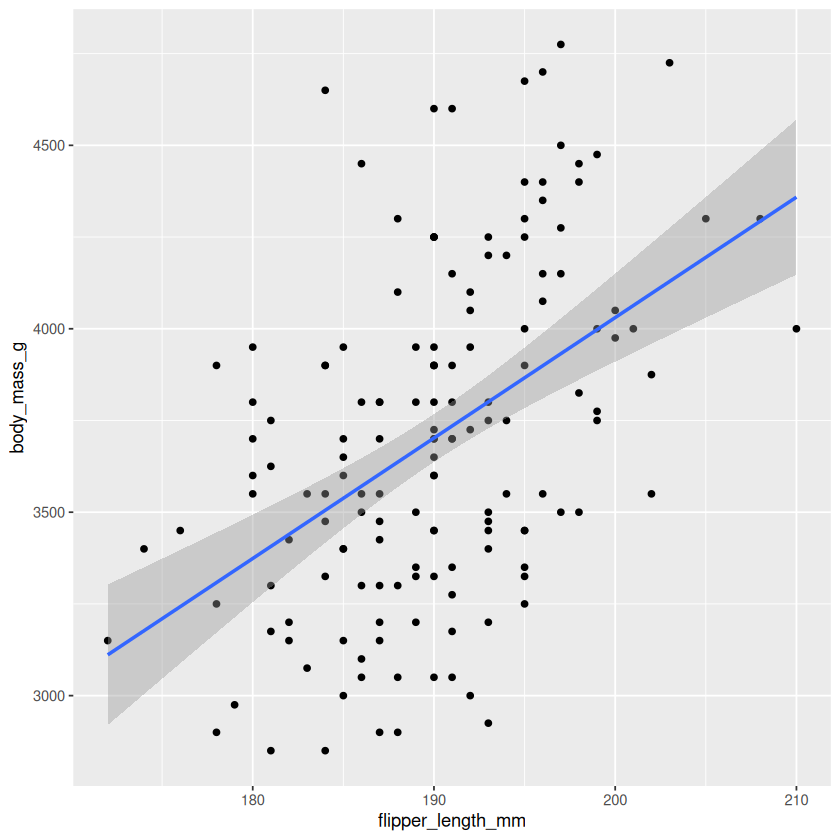

In [4]:
penguins_adelie |>
  ggplot(aes(x = flipper_length_mm, y = body_mass_g)) +
  geom_point() +
  geom_smooth(method = 'lm')

In this particular case, with a simple linear regression, `geom_smooth(method = 'lm')`
adds to the plot the results of a simple linear regression. In more complex cases, 
we may need to obtain data from the model and add that as a layer to ggplot. Furthermore,
we do not have the model object to inspect.

Finalise the plot and export it to outputs as a 120 x 120 mm png

In [5]:
ggsave(
    filename = '../outputs/penguins_adelie_scatter-lm.png',
    width = 120,
    height = 120,
    units = 'mm'
)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


### Fit a linear regression model
Use lm() to fit a simple linear regression model.

In [6]:
penguins_adelie_lm <-
  lm(body_mass_g ~ flipper_length_mm, data = penguins_adelie)

`penguins_adelie_lm` is a linear model object, and simply a **list** (a data structure
in R that has different elements of data, accessed with `$`, like a column in a 
data.frame) with data elements from the model fit. We generally never have to access the list elements manually as we use accessor functions for that. But for example, I have print the structure of the object to show there are names to select various parts
of the model if needed

In [7]:
str(penguins_adelie_lm)

List of 13
 $ coefficients : Named num [1:2] -2535.8 32.8
  ..- attr(*, "names")= chr [1:2] "(Intercept)" "flipper_length_mm"
 $ residuals    : Named num [1:151] 343.3 229.1 -616.3 -350.7 -52.2 ...
  ..- attr(*, "names")= chr [1:151] "1" "2" "3" "5" ...
 $ effects      : Named num [1:151] -45474.5 2629.5 -628.2 -367.4 -76.3 ...
  ..- attr(*, "names")= chr [1:151] "(Intercept)" "flipper_length_mm" "" "" ...
 $ rank         : int 2
 $ fitted.values: Named num [1:151] 3407 3571 3866 3801 3702 ...
  ..- attr(*, "names")= chr [1:151] "1" "2" "3" "5" ...
 $ assign       : int [1:2] 0 1
 $ qr           :List of 5
  ..$ qr   : num [1:151, 1:2] -12.2882 0.0814 0.0814 0.0814 0.0814 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:151] "1" "2" "3" "5" ...
  .. .. ..$ : chr [1:2] "(Intercept)" "flipper_length_mm"
  .. ..- attr(*, "assign")= int [1:2] 0 1
  ..$ qraux: num [1:2] 1.08 1.04
  ..$ pivot: int [1:2] 1 2
  ..$ tol  : num 1e-07
  ..$ rank : int 2
  ..- attr(*, "class")= chr 

#### Examine the fitted model
Examine the residuals of the model using a residual vs fits plot (which = 1). Are
they evenly spread around a residual of 0 in a blob type pattern?

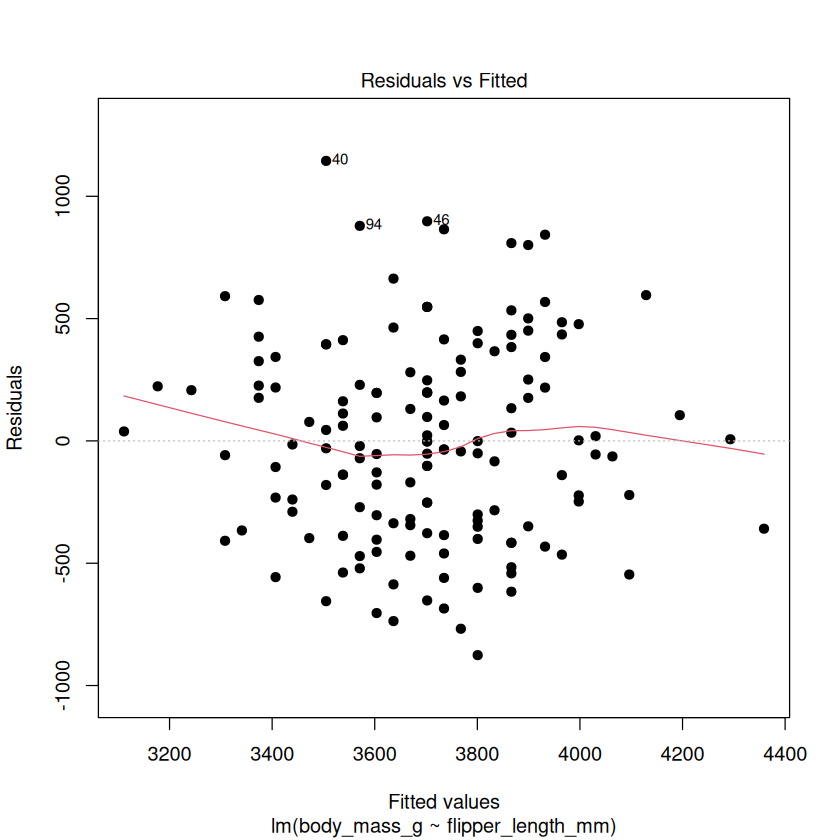

In [8]:
par(bg = "white")
plot(penguins_adelie_lm, which = 1, pch = 19)

***->Yes, the residuals are evenly distributed over the 0 line.***

There are other diagnostic plots for lm .. we are only looking at 1.

In [9]:
?plot.lm

plot.lm                 package:stats                  R Documentation

_P_l_o_t _D_i_a_g_n_o_s_t_i_c_s _f_o_r _a_n '_l_m' _O_b_j_e_c_t

_D_e_s_c_r_i_p_t_i_o_n:

     Six plots (selectable by ‘which’) are currently available: a plot
     of residuals against fitted values, a Scale-Location plot of
     sqrt(| residuals |) against fitted values, a Q-Q plot of
     residuals, a plot of Cook's distances versus row labels, a plot of
     residuals against leverages, and a plot of Cook's distances
     against leverage/(1-leverage).  By default, the first three and
     ‘5’ are provided.

_U_s_a_g_e:

     ## S3 method for class 'lm'
     plot(x, which = c(1,2,3,5), 
          caption = list("Residuals vs Fitted", "Q-Q Residuals",
            "Scale-Location", "Cook's distance",
            "Residuals vs Leverage",
            expression("Cook's dist vs Leverage* " * h[ii] / (1 - h[ii]))),
          panel = if(add.smooth) function(x, y, ...)
     

We can also examine how far each point is from the line of best fit. We should see
a normal, bell shaped curve if the model fits the data well. 

This is one example of us accessing a data element from the `lm()` object. Make
a histogram using `hist()` of the `residuals` element of `penguins_adelie_lm`

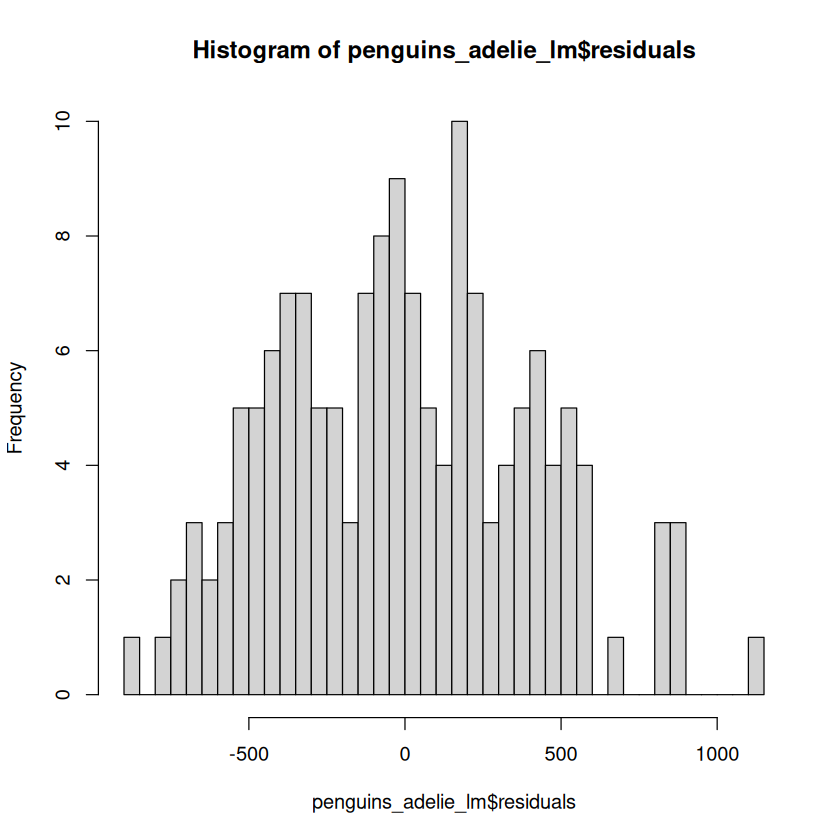

In [10]:
par(bg = "#ffffff") # white background instead of transparent.
hist(penguins_adelie_lm$residuals, breaks = 50)

### Obtain a summary of the model
Use `summary()` to obtain the model summary
  - Is flipper length a good predictor of body mass?
  - Each unit increase in flipper_length_mm is associated with what change in body_mass_g 

In [11]:
summary(penguins_adelie_lm)


Call:
lm(formula = body_mass_g ~ flipper_length_mm, data = penguins_adelie)

Residuals:
    Min      1Q  Median      3Q     Max 
-875.68 -331.10  -14.53  265.74 1144.81 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -2535.837    964.798  -2.628  0.00948 ** 
flipper_length_mm    32.832      5.076   6.468 1.34e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 406.6 on 149 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.2192,	Adjusted R-squared:  0.214 
F-statistic: 41.83 on 1 and 149 DF,  p-value: 1.343e-09


Write a short conclusion paragraph\
***->The fliper length is a good predictor of the body mass of the Adelie penguins. The predicted body mass increases by 32.832 grams for each mm of flipper length***

### Obtaining model predictions
We can use `predict()` to obtain model predictions. We have to provide a data.frame
with values to predict, and the column name must match that of the predictor used
in `lm()`. The data.frame is passed to the `newdata=` argument

Obtain the predicted mass for a flipper_length_mm of 200

In [12]:
predict(penguins_adelie_lm, 
        newdata = data.frame(flipper_length_mm = 200))

1 
4030.501

Depending on the task we can obtain confidence or prediction intervals around the 
estimates. Confidence intervals are used to estimate parameters, while prediction 
intervals are used to make predictions about future values.

To obtain confidence intervals, we need to include the interval argument
Include 'confidence' in the interval argument below

In [13]:
predict(penguins_adelie_lm, 
        newdata = data.frame(flipper_length_mm = 200),
        interval =  'confidence', level = 0.95)

,fit,lwr,upr
1,4030.501,3910.382,4150.621


We can obtain many predictions at once. We need to make a data.frame of values to
use with `predict()`. Create a sequence from 170 to 210 by 10 using `seq()` within
the following code that will create a dta.frame with the column `flipper_length_mm`

In [14]:
flipper_values_predict <-
  data.frame(
    flipper_length_mm = seq(from = 170, to = 210, by = 10)
  )

flipper_values_predict

flipper_length_mm
<dbl>
170
180
190
200
210


Then pass it to predict, which produced a data.frame with 3 columns - `fit`, `lwr`, `upr`


In [15]:
flipper_body_mass_predictions <-
  predict(penguins_adelie_lm, 
          newdata = flipper_values_predict, 
          interval = "confidence")

flipper_body_mass_predictions

,fit,lwr,upr
1,3045.550,2834.998,3256.103
2,3373.867,3254.527,3493.208
3,3702.184,3636.806,3767.562
4,4030.501,3910.382,4150.621
5,4358.818,4147.382,4570.255


Join back the `flipper_length_mm` values


In [16]:
flipper_body_mass_predictions <-
  flipper_body_mass_predictions |> 
  bind_cols(
    flipper_values_predict
  )

flipper_body_mass_predictions

fit,lwr,upr,flipper_length_mm
<dbl>,<dbl>,<dbl>,<dbl>
3045.550,2834.998,3256.103,170
3373.867,3254.527,3493.208,180
3702.184,3636.806,3767.562,190
4030.501,3910.382,4150.621,200
4358.818,4147.382,4570.255,210


You could use the predictions data.frame to add the model data layer to a ggplot()
instead of using geom_smooth(). This is more useful with complex models.

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


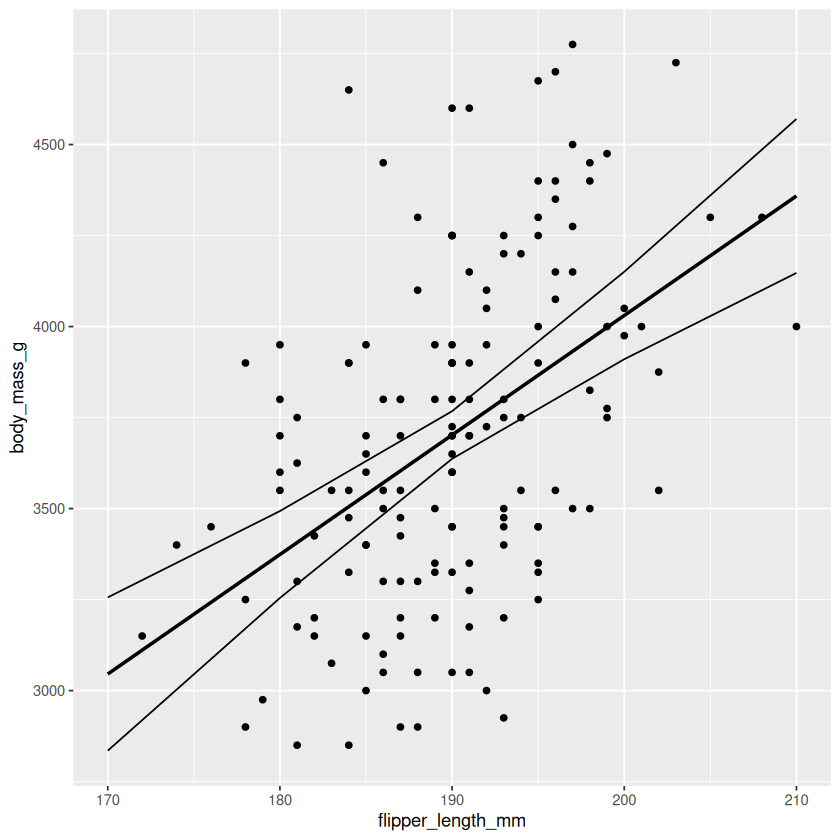

In [17]:
penguins_adelie %>% 
  ggplot(aes(x = flipper_length_mm, y = body_mass_g)) +
  geom_point() +
  geom_line(data = flipper_body_mass_predictions, mapping = aes(y = fit), linewidth = 1) +
  geom_line(data = flipper_body_mass_predictions, mapping = aes(y = lwr)) +
  geom_line(data = flipper_body_mass_predictions, mapping = aes(y = upr))


---
## Extra exercises - Multiple linear regression

The cell_growth.csv contains the cell diameter and concentration of Tetrahymena 
cells with and without glucose added to growth medium. Glucose = 1 means glucose
was added, Glucose = 2 means glucose was absent

A researcher wants to know how cell concentration and glucose addition affect
the cell diameter of Tetrahymena.
#### 2.1 Import data
 Import cell_growth.csv

In [18]:
cell_growth <-
  readr::read_csv(file = '../data/cell_growth.csv', show_col_types = FALSE)
  head(cell_growth,n = 2)

glucose,cell_conc,cell_diameter
<dbl>,<dbl>,<dbl>
1,631000,21.2
1,592000,21.5


#### 2.2 Visualise data
Make a scatter plot of cell diameter and concentration, coloured by glucose
The glucose legend should only be 2 values.

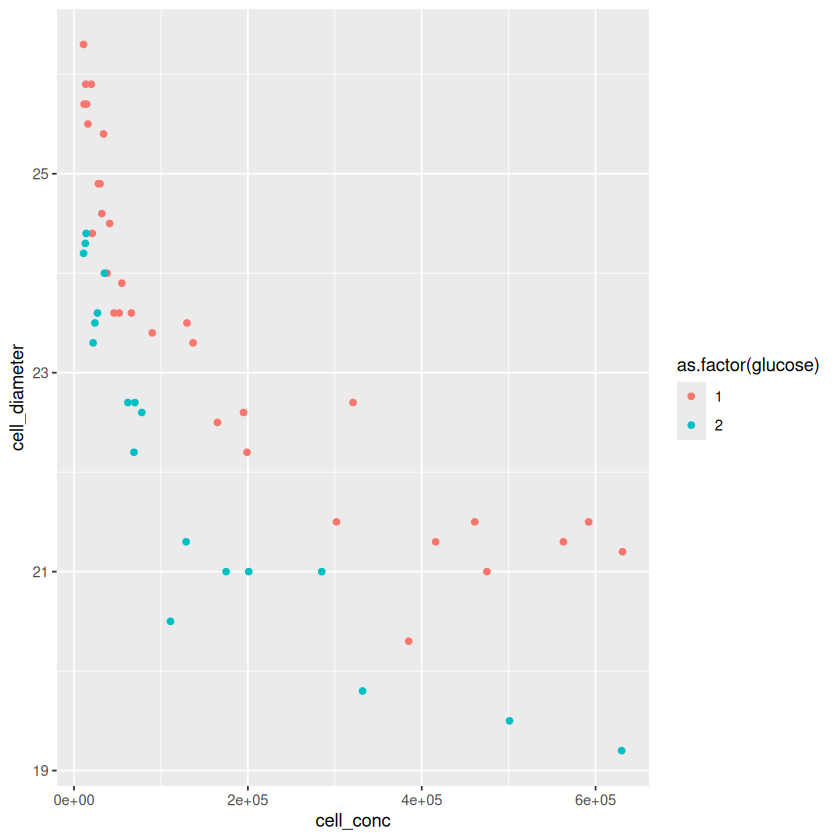

In [19]:
cell_growth |> 
  ggplot(aes(x = cell_conc , y = cell_diameter, colour = as.factor(glucose))) +
  geom_point()

Is trend linear?\
***->It is not a straight line, so it is not 'linear'.***

We need to create a factor out of glucose.

In [20]:
cell_growth <-
  cell_growth |>
  mutate(glucose = factor(glucose, labels = c('Yes', 'No')))

Try log transforming cell_conc before making the plot.\
If the trend look linear, then that is how we should include the predictor in the linear model.

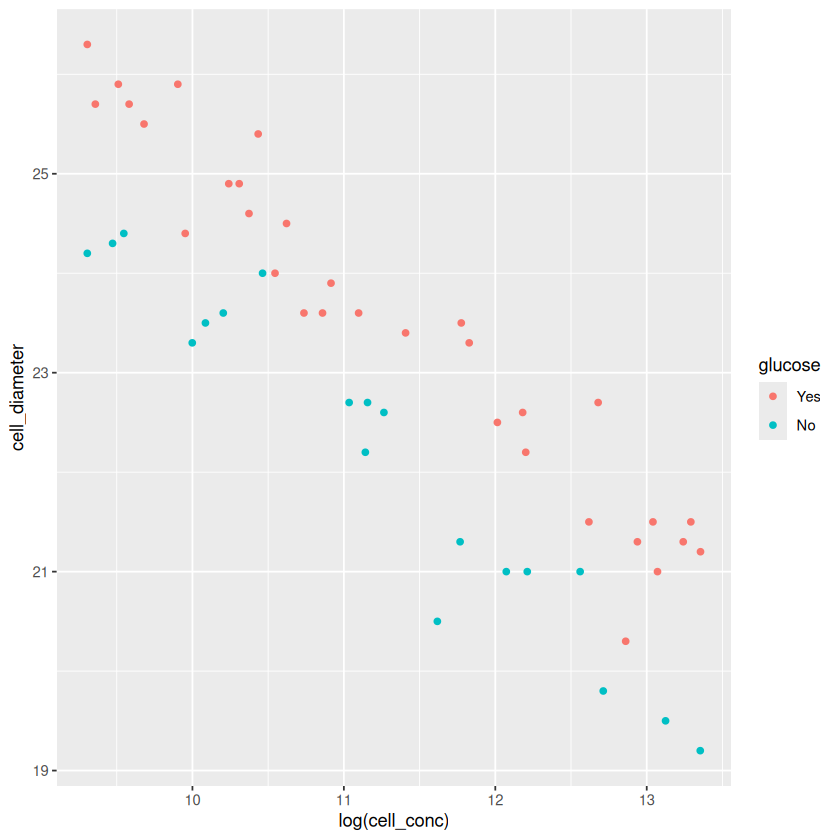

In [21]:
cell_growth |> 
  ggplot(aes(x = log(cell_conc) , y = cell_diameter, color = glucose)) +
  geom_point() 

#### 2.3 Fit a linear model
We are using the * between predictor for a "crossed" design. It means the\
regression slope for each glucose treatment can be different (we could also \
constrain them to be the same).

In [22]:
cell_growth_lm <-
  lm(cell_diameter ~ log10(cell_conc) * glucose, data = cell_growth) 

#### 2.4 Examine the fitted model

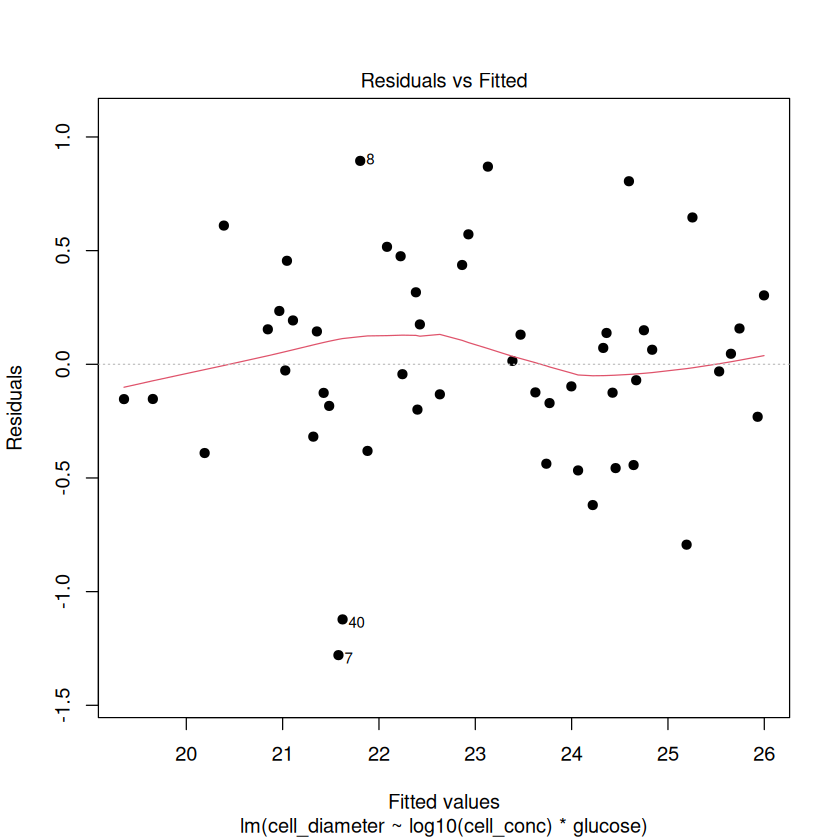

In [24]:
par(bg = "#ffffff") # white background instead of transparent.
plot(cell_growth_lm, which = 1, pch = 19)

Are the residuals evenly spread without nay pattern?\
***->They seem to be.***

Possible outliers have numbers, but we will not deal with them further.

#### 2.5 Obtain the summary of the fitted model
Use summary() on the linear model object

In [25]:
summary(cell_growth_lm)


Call:
lm(formula = cell_diameter ~ log10(cell_conc) * glucose, data = cell_growth)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.27935 -0.19123 -0.02723  0.21369  0.89475 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 37.5594     0.7093  52.953   <2e-16 ***
log10(cell_conc)            -2.8610     0.1434 -19.946   <2e-16 ***
glucoseNo                   -0.7547     1.2110  -0.623    0.536    
log10(cell_conc):glucoseNo  -0.1482     0.2464  -0.602    0.550    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.463 on 47 degrees of freedom
Multiple R-squared:  0.9392,	Adjusted R-squared:  0.9353 
F-statistic: 242.1 on 3 and 47 DF,  p-value: < 2.2e-16


This is a bit difficult to read if you have not seen it before. It is like
this for a statistical estimation reason that we will not discuss further 

In [ ]:
# (Intercept)                        = the intercept for glucose = 1
# log10(cell_conc)                   = the slope for glucose = 1             
# factor(glucose)2                   = difference in intercept for glucose 2 to glucose 1   
# log10(cell_conc):factor(glucose)2  = difference in slope for glucose 2 to glucose 1

Is the slope between cell_diameter and log10(cell_conc) different between glucose levels?\
***->No, the splope is not different. 'log10(cell_conc):gluoseNo' means the cross correlation between these two variables for the cell_diamenter and it is not significant. Curious that neither glusose alone seems to be significant, even when it seemed clear in the graph.***

***->Let's plot the model to see the regresion lines for each glucose treatment***

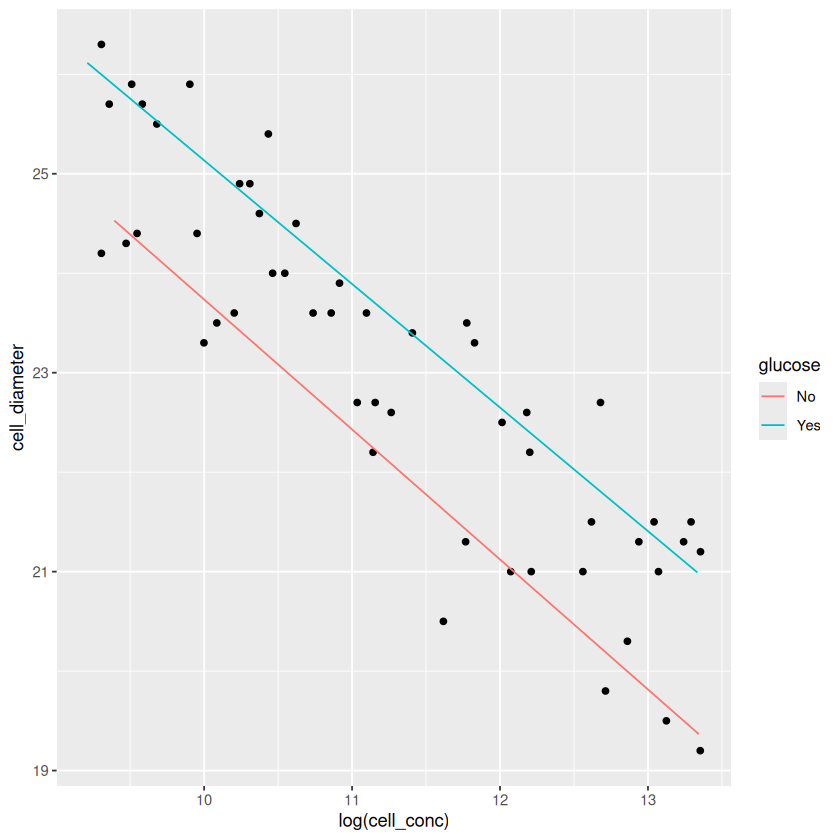

In [37]:
predict_line <-
data.frame (cell_conc = seq(from = 10000, to = 625000, by = 2000),
            glucose = sample(c("No", "Yes"), size = 308, replace = T))

predict_line <- predict_line |>
bind_cols(predict(cell_growth_lm, newdata = predict_line, interval = 'confidence'))

cell_growth |>
ggplot(aes(x = log(cell_conc), y = cell_diameter)) +
geom_point() +
geom_line(data = predict_line, mapping = aes(y = fit, colour = glucose))

#### 2.6 Analysis of variance
We can conduct an ANOVA on this model to test the hypotheses

Use anova() on the linear model object 

In [28]:
aov(cell_growth_lm)

Call:
   aov(formula = cell_growth_lm)

Terms:
                log10(cell_conc)   glucose log10(cell_conc):glucose Residuals
Sum of Squares         129.53558  26.03353                  0.07757  10.07332
Deg. of Freedom                1         1                        1        47

Residual standard error: 0.4629535
Estimated effects may be unbalanced

1. Is there a relationship between cell_diameter and cell concentration regardless of glucose addition?\
***->Yes, it is. The p-value of 'log10(cell_conc):glucose' is higher than 0.05 what means there is no difference in the response variable due to the interaction of these two independent variables.***
2. Does glucose addition affect cell diamenter regardless of cell concentration?\
***->Yes, it does. The p-value of 'glucose' is ~1.26e-14, so the factor makes a difference in cell_diameter variable. The same as in the previous answer also applies for glucose.***
3. Does glucose affect the relationship between cell diameter and cell concentration?\
***->No, it doesn't. Glucose addition affects cell diameter but it doesn't affect the influence of cell concentration on cell diameter.***
